### Question 1(a)
Simulate a Bernoulli(0.4) RV (a biased coin) tossed 28 times. Plot the outcomes against the trial number.


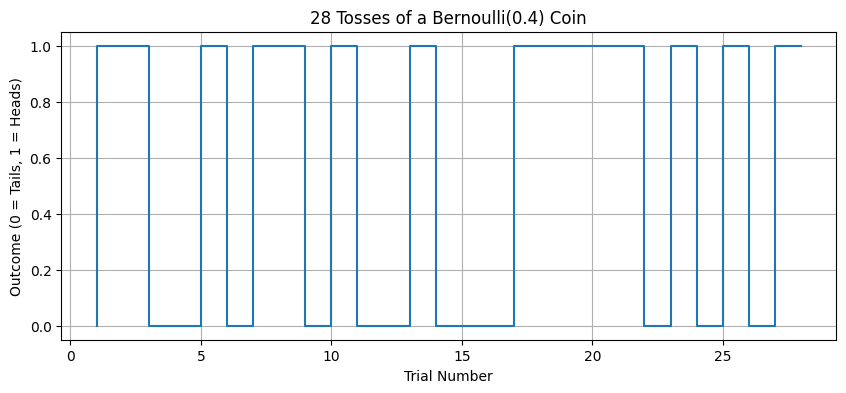

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
p = 0.4
n_trials = 28
outcomes = np.random.binomial(1, p, n_trials)

plt.figure(figsize=(10, 4))
plt.step(range(1, n_trials + 1), outcomes, where='pre')
plt.title('28 Tosses of a Bernoulli(0.4) Coin')
plt.xlabel('Trial Number')
plt.ylabel('Outcome (0 = Tails, 1 = Heads)')
plt.grid(True)
plt.show()


**Observation:**  
The plot will show a step graph where each trial results in either a 0 (failure) or 1 (success). Since the probability of success (1) is 0.4, we expect roughly 40% of the outcomes to be 1 and the rest to be 0. You’ll observe the randomness in the pattern, but there should be more 0s than 1s overall due to the bias of the coin.


### Question 1(b)
Repeat the above simulation 9 times and plot all outcomes on a single figure against trial number.


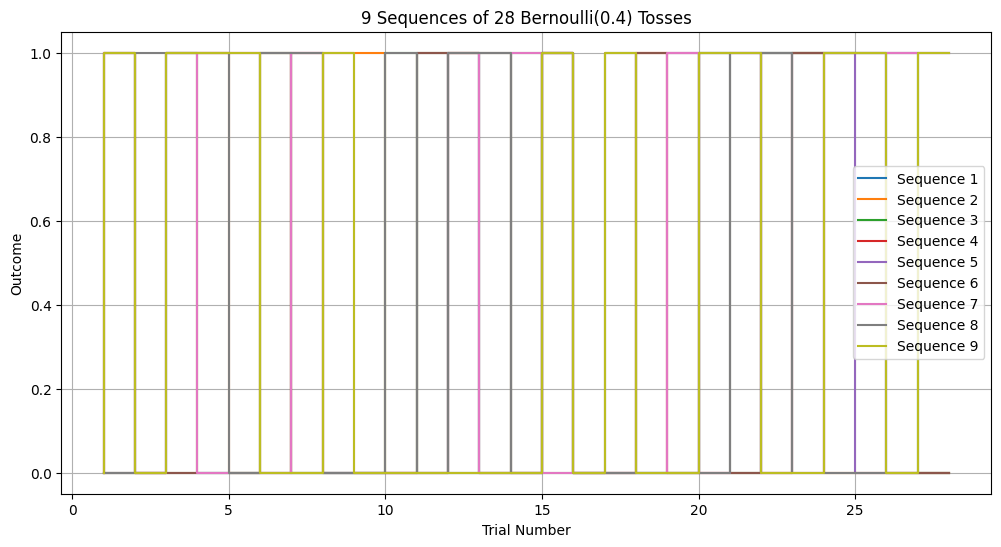

In [2]:
np.random.seed(1)
num_repeats = 9
outcomes_matrix = np.random.binomial(1, p, (num_repeats, n_trials))

plt.figure(figsize=(12, 6))
for i in range(num_repeats):
    plt.step(range(1, n_trials + 1), outcomes_matrix[i], where='pre', label=f'Sequence {i+1}')
    
plt.title('9 Sequences of 28 Bernoulli(0.4) Tosses')
plt.xlabel('Trial Number')
plt.ylabel('Outcome')
plt.legend()
plt.grid(True)
plt.show()


**Observation:**  
The figure displays 9 different sequences of 28 Bernoulli trials each. Each line shows a different path of outcomes. While randomness makes each sequence look different, all generally reflect the 0.4 probability bias — most sequences will have around 10–12 heads (1s) and the rest tails (0s). The overlapping lines illustrate variability across repeated experiments, despite having the same parameters.




### Question 1(c)
Repeat the 28-toss simulation 50 times and store them in an array. For each sequence, calculate the total number of 1s (heads) and plot a histogram.  
Which PMF does the histogram approximate?


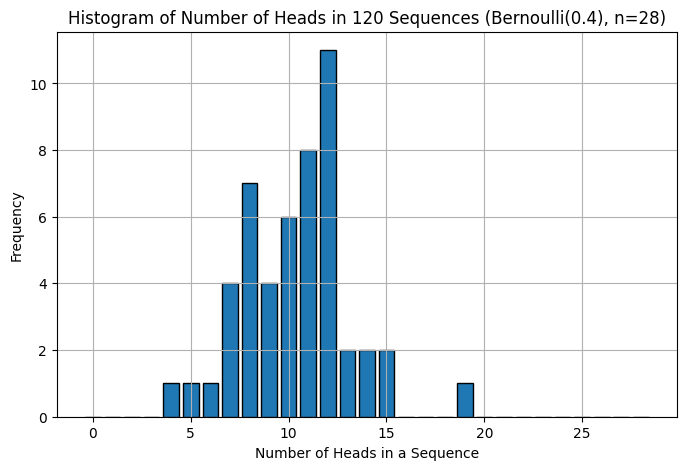

In [3]:
np.random.seed(2)
num_sequences = 50
sequences = np.random.binomial(1, p, (num_sequences, n_trials))
sums = sequences.sum(axis=1)

plt.figure(figsize=(8, 5))
plt.hist(sums, bins=range(0, n_trials + 2), align='left', rwidth=0.8, edgecolor='black')
plt.title('Histogram of Number of Heads in 120 Sequences (Bernoulli(0.4), n=28)')
plt.xlabel('Number of Heads in a Sequence')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Observation:**  

The histogram of total number of heads per sequence closely resembles the Binomial(28, 0.4) distribution, since each sequence is a sum of 28 independent Bernoulli(0.4) trials. The shape is unimodal, centered around 
28×0.4=11.2, matching the theoretical Binomial PMF.

### Question 1(d)
Starting with the array obtained in (c), choose all sequences that sum to at least 2 heads.  
For these sequences, plot a histogram of the total number of heads.  
Which PMF does the histogram approximate?


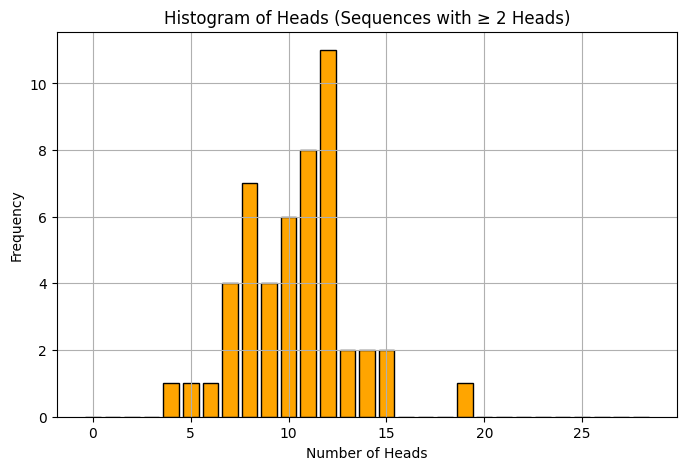

In [4]:
filtered_sums = sums[sums >= 2]

plt.figure(figsize=(8, 5))
plt.hist(filtered_sums, bins=range(0, n_trials + 2), align='left', rwidth=0.8, edgecolor='black', color='orange')
plt.title('Histogram of Heads (Sequences with ≥ 2 Heads)')
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Observation:**  
This is the PMF of a truncated Binomial(28, 0.4) distribution, where outcomes with <2 successes are excluded. The histogram looks similar to 1(c) but is shifted right (since lower counts are removed), slightly changing the shape and increasing relative frequencies of higher head counts.

## Question 2  
Pick 5 values of alpha uniformly and randomly from the interval (0,120).  
For each alpha, simulate a Binomial(n,p) RV, with (n) chosen as small as possible such that the histogram approximates the PMF of a Poisson(alpha) distribution.  
Also, simulate the corresponding Poisson(alpha) RVs and compare the histograms.


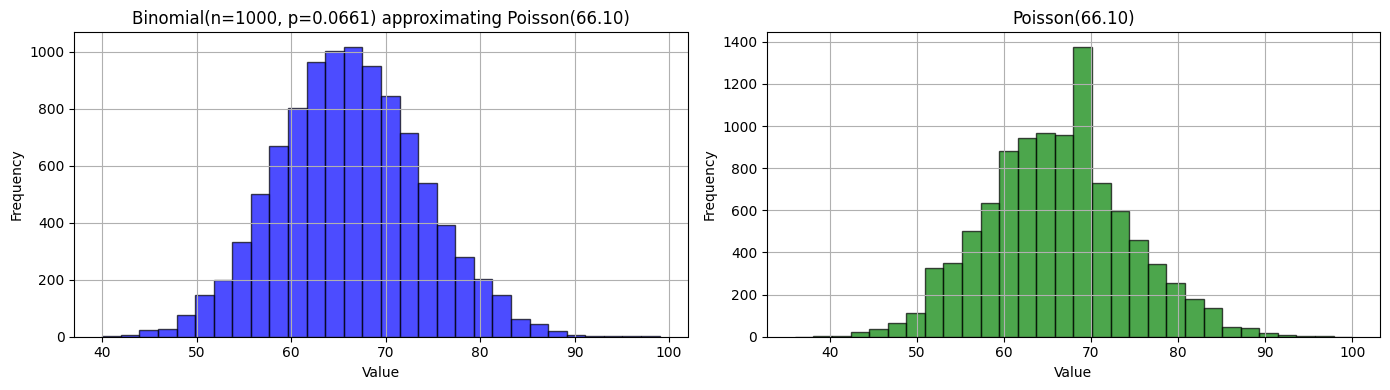

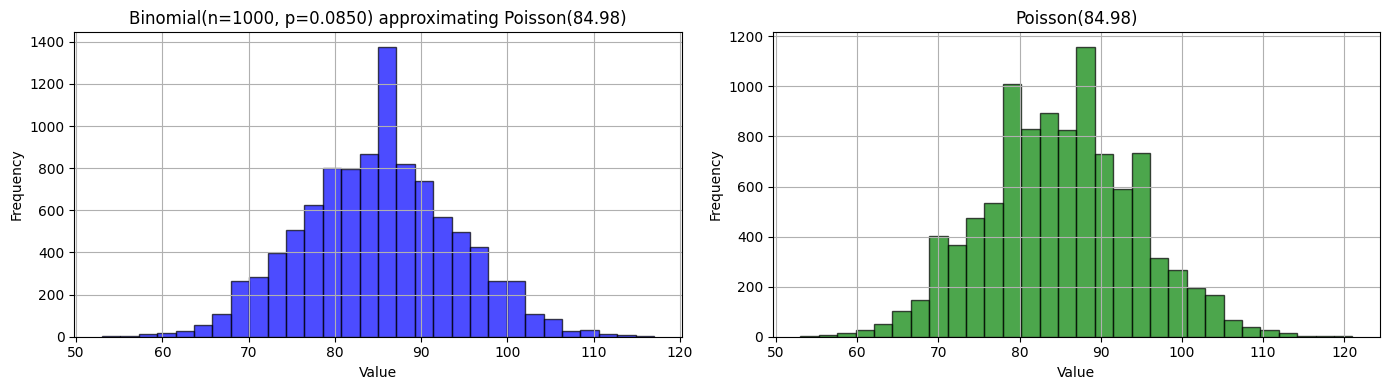

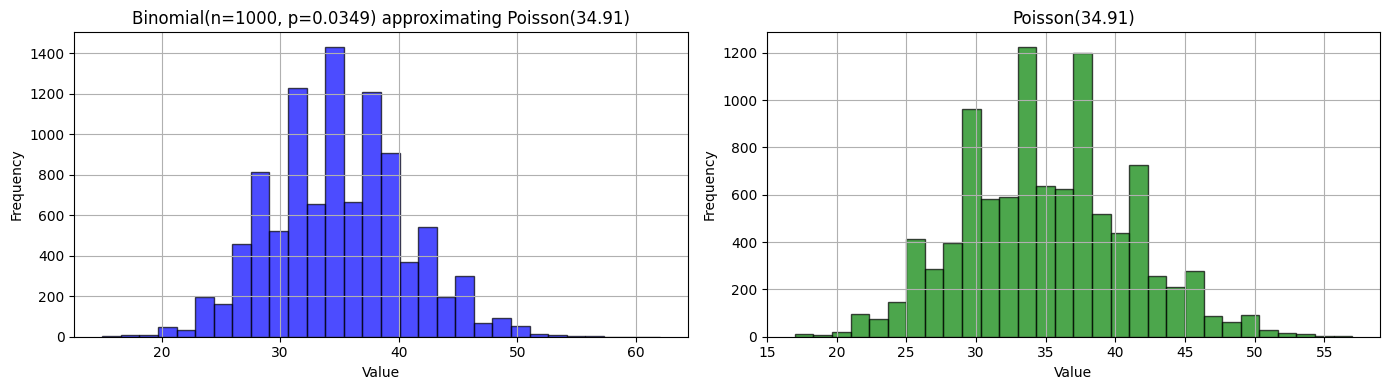

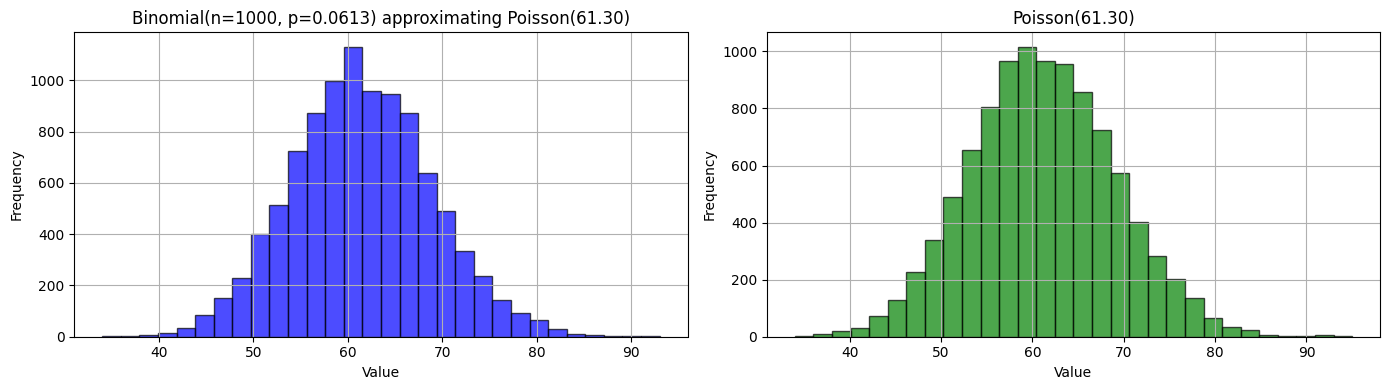

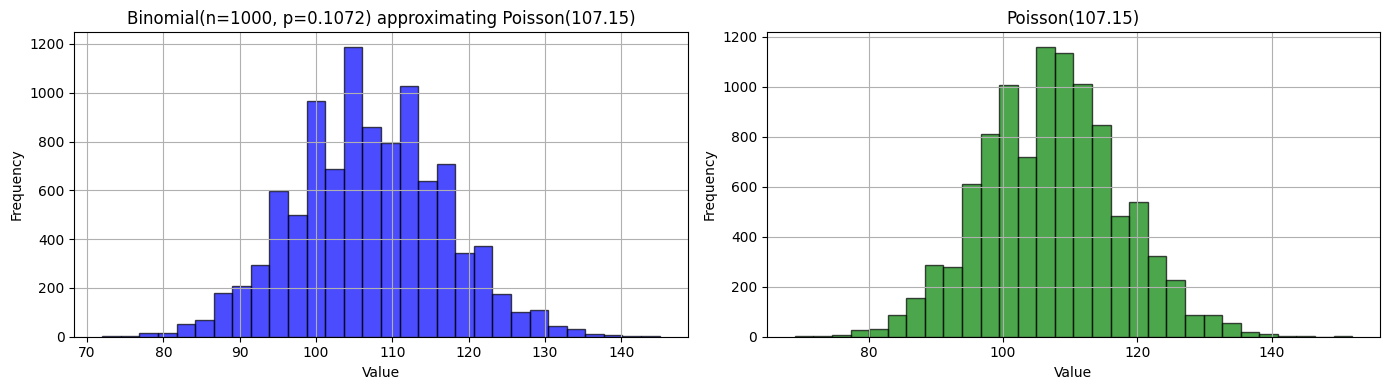

In [5]:
np.random.seed(3)
experiments = 10000
n_val = 1000
alphas = np.random.uniform(0, 120, 5)

for alpha in alphas:
    n = n_val
    p_val = alpha / n
    binom_samples = np.random.binomial(n, p_val, experiments)
    poisson_samples = np.random.poisson(alpha, experiments)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    axes[0].hist(binom_samples, bins=30, color='blue', edgecolor='black', alpha=0.7)
    axes[0].set_title(f'Binomial(n={n}, p={p_val:.4f}) approximating Poisson({alpha:.2f})')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(True)
    
    axes[1].hist(poisson_samples, bins=30, color='green', edgecolor='black', alpha=0.7)
    axes[1].set_title(f'Poisson({alpha:.2f})')
    axes[1].set_xlabel('Value')
    axes[1].set_ylabel('Frequency')
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()


**Observation:**  
In this question, we simulate Binomial random variables with parameters n = 1000 and p = alpha/n, where alpha is randomly chosen from the interval (0, 120). We compare their histograms with those of Poisson(alpha) distributions. The approximation works well because when n is large and p is small (but np = alpha is constant), the Binomial distribution converges to the Poisson distribution. This is known as the Poisson limit theorem. The side-by-side histograms for each alpha show that the Binomial and Poisson samples have similar shapes and means, especially for moderate to large alpha. This validates that Poisson distributions can effectively approximate rare-event Binomial processes when these conditions are satisfied.


## Question 3  
Illustrate the Law of Large Numbers (LLN) and the Central Limit Theorem (CLT) for the sum of independent and identically distributed Poisson(\(\alpha\)) RVs.  
Choose two values of \(\alpha\) uniformly at random from the interval (1,30).  
For each \(\alpha\), demonstrate the effect over an increasing sequence of the number of RVs being added.


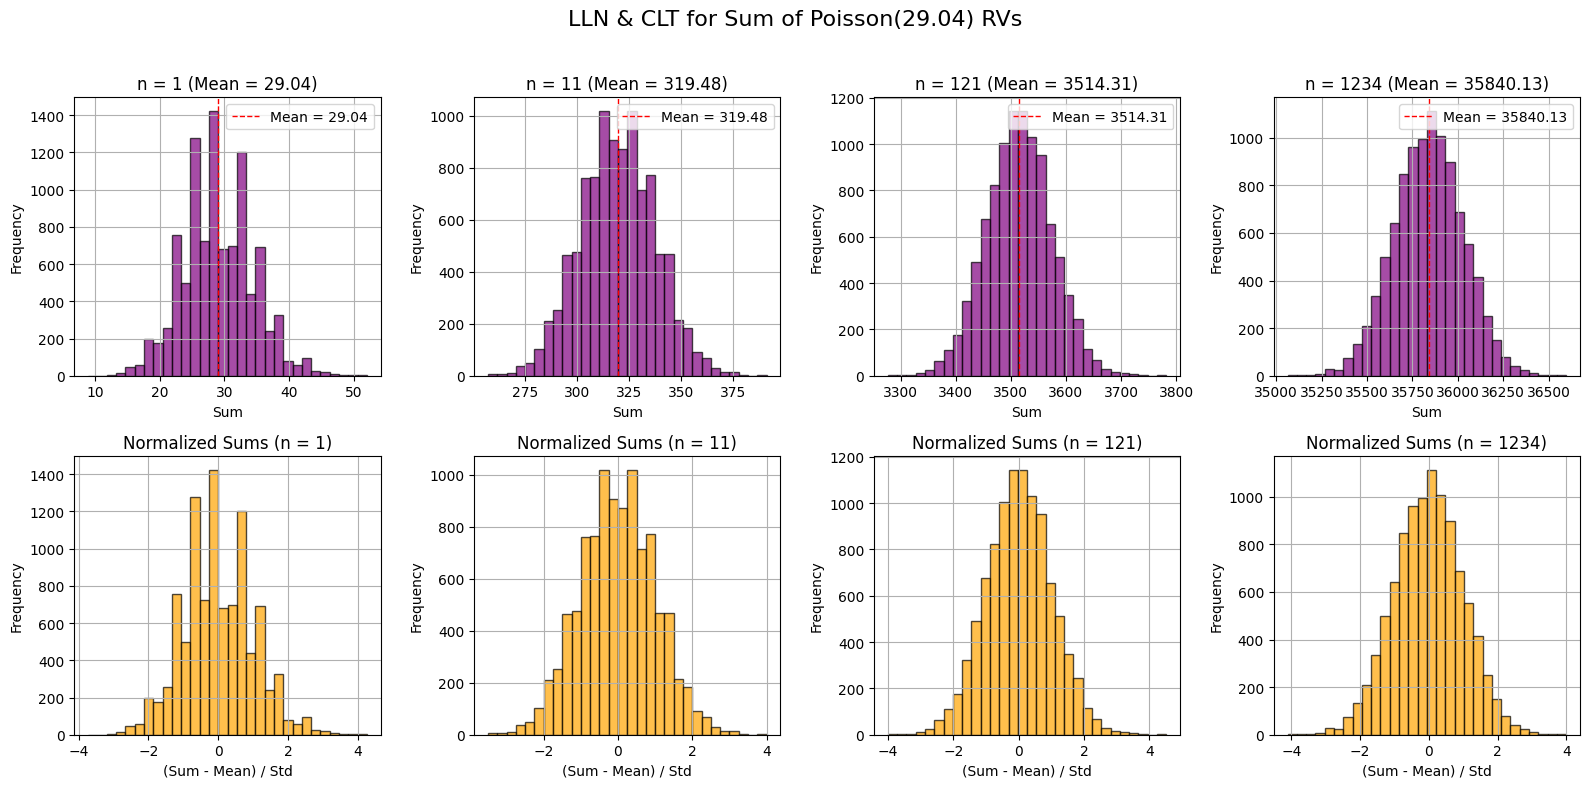

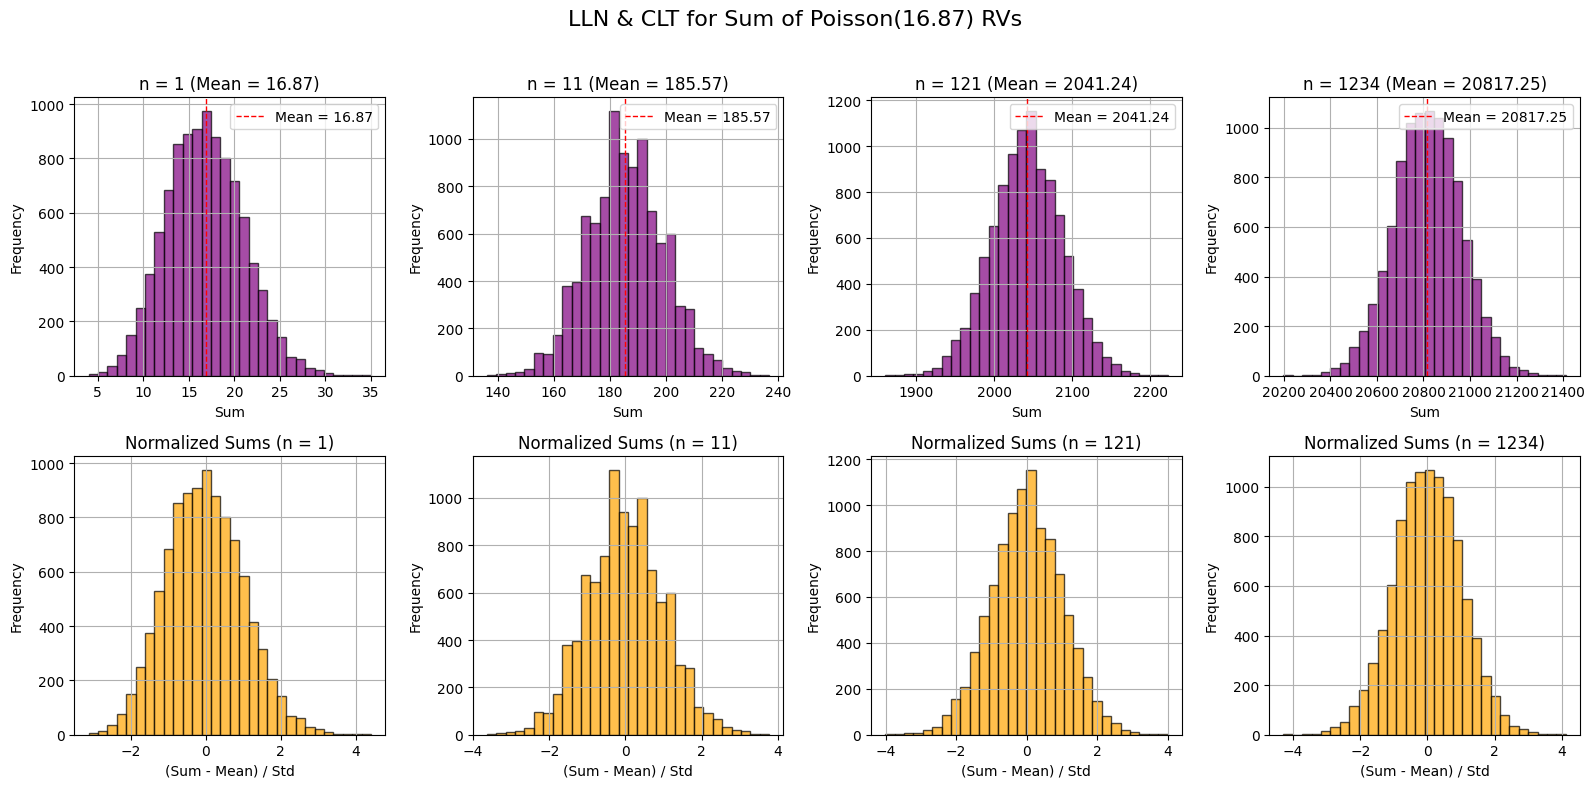

In [6]:
np.random.seed(4)
alphas_lln = np.random.uniform(1, 30, 2)
n_values = [1, 11, 121, 1234]
experiments = 10000

for alpha in alphas_lln:
    fig, axes = plt.subplots(2, len(n_values), figsize=(4*len(n_values), 8))
    fig.suptitle(f'LLN & CLT for Sum of Poisson({alpha:.2f}) RVs', fontsize=16)
    
    for i, n in enumerate(n_values):
        samples = np.random.poisson(alpha, (experiments, n))
        sums_samples = samples.sum(axis=1)
        mean_sum = n * alpha
        axes[0, i].hist(sums_samples, bins=30, color='purple', edgecolor='black', alpha=0.7)
        axes[0, i].axvline(mean_sum, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean_sum:.2f}')
        axes[0, i].set_title(f'n = {n} (Mean = {mean_sum:.2f})')
        axes[0, i].set_xlabel('Sum')
        axes[0, i].set_ylabel('Frequency')
        axes[0, i].legend()
        axes[0, i].grid(True)
        std_sum = np.sqrt(n * alpha)
        normalized_sums = (sums_samples - mean_sum) / std_sum
        axes[1, i].hist(normalized_sums, bins=30, color='orange', edgecolor='black', alpha=0.7)
        axes[1, i].set_title(f'Normalized Sums (n = {n})')
        axes[1, i].set_xlabel('(Sum - Mean) / Std')
        axes[1, i].set_ylabel('Frequency')
        axes[1, i].grid(True)
        
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


**Observation:**  
This question demonstrates both the Law of Large Numbers (LLN) and the Central Limit Theorem (CLT) using Poisson(alpha) random variables. Two values of alpha are randomly selected from the interval (1, 30). For increasing n, we take sums of n independent and identically distributed Poisson(alpha) variables. As n increases, the distribution of the sums concentrates around the expected value n * alpha, illustrating LLN. Additionally, when the sums are normalized (by subtracting the mean and dividing by the standard deviation), the resulting distributions become more bell-shaped and symmetric, showing convergence to the standard normal distribution. This confirms CLT, which states that sums of i.i.d. variables approach a normal distribution as sample size increases.
